In [1]:
import os
import json
from copy import deepcopy
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_curve, auc


# Process Experiment Results

This notebook generates the metrics and grpahs presented in the publication.

In [2]:
embeddings_metadata = {
    "bge-reranker-v2-m3" : {
        "params" : 0.568,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "BAAI/bge-reranker-v2-m3"
    },
    "bge-reranker-v2-m3---no-enhance" : {
        "params" : 0.568,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "BAAI/bge-reranker-v2-m3"
    },
    "gte-modernbert-base" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Alibaba-NLP/gte-modernbert-base"
    },
    "gte-modernbert-base---no-enhance" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Alibaba-NLP/gte-modernbert-base"
    },
    "gte-reranker-modernbert-base" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "Alibaba-NLP/gte-reranker-modernbert-base"
    },
    "gte-reranker-modernbert-base---no-enhance" : {
        "params" : 0.150,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "Alibaba-NLP/gte-reranker-modernbert-base"
    },
    "jina-reranker-v2-base-multilingual" : {
        "params" : 0.278,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "jinaai/jina-reranker-v2-base-multilingual"
    },
    "jina-reranker-v2-base-multilingual---no-enhance" : {
        "params" : 0.278,
        "instruction_applied" : False,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "jinaai/jina-reranker-v2-base-multilingual"
    },
    "multilingual-e5-large-instruct" : {
        "params" : 0.560,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "intfloat/multilingual-e5-large-instruct"
    },
    "multilingual-e5-large-instruct---no-enhance" : {
        "params" : 0.560,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "intfloat/multilingual-e5-large-instruct"
    },
    "multilingual-e5-large-instruct---no-instruct,no-enhance" : {
        "params" : 0.560,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "intfloat/multilingual-e5-large-instruct"
    },
    "Qwen3-Embedding-0.6B" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Qwen/Qwen3-Embedding-0.6B"
    },
    "Qwen3-Embedding-0.6B---no-enhance" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-0.6B"
    },
    "Qwen3-Embedding-0.6B---no-instruct,no-enhance" : {
        "params" : 0.6,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-0.6B"
    },
    "Qwen3-Embedding-4B" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Qwen/Qwen3-Embedding-4B"
    },
    "Qwen3-Embedding-4B---no-enhance" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-4B"
    },
    "Qwen3-Embedding-4B---no-instruct,no-enhance" : {
        "params" : 4,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-4B"
    },
    "Qwen3-Reranker-0.6B-seq-cls" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-0.6B-seq-cls"
    },
    "Qwen3-Reranker-0.6B-seq-cls---no-enhance" : {
        "params" : 0.6,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-0.6B-seq-cls"
    },
    "Qwen3-Reranker-4B-seq-cls" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-4B-seq-cls"
    },
    "Qwen3-Reranker-4B-seq-cls---no-enhance" : {
        "params" : 4,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-4B-seq-cls"
    },
    "Qwen3-Reranker-8B-seq-cls" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : True,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-8B-seq-cls"
    },
    "Qwen3-Reranker-8B-seq-cls---no-enhance" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : True,
        "a-vert_enhance" : False,
        "huggingface_name" : "tomaarsen/Qwen3-Reranker-8B-seq-cls"
    },
    "Qwen3-Embedding-8B" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : True,
        "huggingface_name" : "Qwen/Qwen3-Embedding-8B"
    },
    "Qwen3-Embedding-8B---no-enhance" : {
        "params" : 8,
        "instruction_applied" : True,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-8B"
    },
    "Qwen3-Embedding-8B---no-instruct,no-enhance" : {
        "params" : 8,
        "instruction_applied" : False,
        "reranker" : False,
        "a-vert_enhance" : False,
        "huggingface_name" : "Qwen/Qwen3-Embedding-8B"
    },
}




In [3]:
DATA_PATH = f'../data/exploratory_analysis/'
TAGS_PATH = f'../data/implemented/'
BASELINES_PATH = f'../data/baselines/'

BEST_MODEL = "Qwen3-Reranker-4B-seq-cls"
BEST_IS_INSTRUCTED = True
BEST_IS_RERANKER = True
BEST_IS_ENHANCED = True

SAVE_FIGURES = False
OUTPUT_PATH_FIGURES = './output'

In [4]:
if SAVE_FIGURES:
    if not os.path.exists(OUTPUT_PATH_FIGURES):
        os.makedirs(OUTPUT_PATH_FIGURES)

### Load human tags

In [5]:
tags_rows = list()
for lm_dir in os.listdir(TAGS_PATH):
    model_path = os.path.join(TAGS_PATH, lm_dir)
    if not os.path.isdir(model_path):
        continue
    # The file should be here
    tags_path = os.path.join(TAGS_PATH, lm_dir, "human_labels.jsonl")
    # Read all lines
    with open(tags_path, 'r') as f:
        for i, line in enumerate(f):
            obj = json.loads(line)
            tags_rows.append(
                [
                    lm_dir,
                    obj["dataset_task"],
                    obj["line"],
                    obj["label"]=="Correct",
                ]
            )
tags_df = pd.DataFrame(tags_rows, columns=["language_model", "dataset_task", "prompt_idx", "human_tag"])
print(f"Read {len(tags_df)} tagged samples")

Read 11690 tagged samples


In [6]:
tags_df.head()

,language_model,dataset_task,prompt_idx,human_tag
0,gpt-oss-20b,babi-task_15-basic_deduction,10,True
1,gpt-oss-20b,babi-task_15-basic_deduction,11,True
2,gpt-oss-20b,babi-task_15-basic_deduction,12,True
3,gpt-oss-20b,babi-task_15-basic_deduction,13,True
4,gpt-oss-20b,babi-task_15-basic_deduction,14,True


### Load exploratory tests

In [7]:
data_rows = list()
# For each embedding model tested

for emb_model_dir in tqdm(os.listdir(DATA_PATH), total=len(os.listdir(DATA_PATH))):
    emb_path = os.path.join(DATA_PATH, emb_model_dir)
    if not os.path.isdir(emb_path):
        continue
    # For each LM tested
    for lm_dir in os.listdir(emb_path):
        # For each results file
        model_path = os.path.join(emb_path, lm_dir)
        for result_file in os.listdir(model_path):
            if ".jsonl" not in result_file:
                continue
            # Read all lines
            with open(os.path.join(model_path, result_file), 'r') as f:
                for i, line in enumerate(f):
                    obj = json.loads(line)
                    # Get model metadata
                    model_metadata = embeddings_metadata[emb_model_dir]
                    # Add entry
                    data_rows.append(
                        [
                            model_metadata["huggingface_name"].split("/")[-1],
                            model_metadata["params"],
                            model_metadata["instruction_applied"],
                            model_metadata["reranker"],
                            model_metadata["a-vert_enhance"],
                            lm_dir,
                            result_file.split('_2025')[0].split('samples_')[-1],
                            obj["doc_id"],
                            obj["a-vert_match"],
                            obj["a-vert_correct_score"],
                            obj["a-vert_wrong_score"],
                            obj["semscore"],
                        ]
                    )
                    
data_df = pd.DataFrame(data_rows, columns=["embedding_model", 
                                           "params_billons",
                                           "instruction_applied",
                                           "reranker",
                                           "enhance",
                                           "language_model", 
                                           "dataset_task", 
                                           "prompt_idx", 
                                           "a-vert_match", 
                                           "a-vert_correct_score", 
                                           "a-vert_wrong_score", 
                                           "semscore"])
print(f"Read {len(data_df)} experiment samples")

100%|██████████| 26/26 [00:32<00:00,  1.27s/it]


Read 709800 experiment samples


In [8]:
data_df.head()

,embedding_model,params_billons,instruction_applied,reranker,enhance,language_model,dataset_task,prompt_idx,a-vert_match,a-vert_correct_score,a-vert_wrong_score,semscore
0,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,0,True,0.579398,0.420602,0.0
1,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,1,True,0.584551,0.415449,0.0
2,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,2,True,0.584890,0.415110,0.0
3,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,3,True,0.574971,0.425029,0.0
4,Qwen3-Embedding-4B,4.0,True,False,True,gpt-oss-20b,babi-task_13-compound_coreference,4,True,0.575064,0.424936,0.0


### Combine experiment data with tags

In [9]:
merged_df = pd.merge(tags_df, data_df, on=['language_model', 'dataset_task', 'prompt_idx'])
# Create a column where the human tag and a-vert agree
merged_df["agree"] = merged_df["human_tag"]==merged_df["a-vert_match"]
print(f"Total number of test samples tagged: {len(merged_df)}\n")
print("Samples per LM:")
print(merged_df['language_model'].value_counts())
print("")
print("Samples per embedding/reranker:")
print(merged_df['embedding_model'].value_counts())


Total number of test samples tagged: 303940

Samples per LM:
language_model
Meta-Llama-3-3-70B-Instruct-AWQ-INT4    114660
gpt-oss-20b                              94640
Qwen3-30B-A3B-GPTQ-Int4                  94640
Name: count, dtype: int64

Samples per embedding/reranker:
embedding_model
Qwen3-Embedding-4B                    35070
Qwen3-Embedding-0.6B                  35070
multilingual-e5-large-instruct        35070
Qwen3-Embedding-8B                    35070
gte-reranker-modernbert-base          23380
Qwen3-Reranker-8B-seq-cls             23380
Qwen3-Reranker-0.6B-seq-cls           23380
bge-reranker-v2-m3                    23380
gte-modernbert-base                   23380
Qwen3-Reranker-4B-seq-cls             23380
jina-reranker-v2-base-multilingual    23380
Name: count, dtype: int64


In [10]:
def get_type(row):
    _,row=row
    if "babi" in row['dataset_task']:
        return "bAbI / open-ended"
    else:
        return "MMLU / multiple-choice"
    
merged_df['task_type'] = [get_type(a) for a in merged_df.iterrows()]

In [11]:
merged_df.head()

,language_model,dataset_task,prompt_idx,human_tag,embedding_model,params_billons,instruction_applied,reranker,enhance,a-vert_match,a-vert_correct_score,a-vert_wrong_score,semscore,agree,task_type
0,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Embedding-4B,4.00,True,False,True,True,0.549356,0.450644,0.000000,True,bAbI / open-ended
1,gpt-oss-20b,babi-task_15-basic_deduction,10,True,gte-reranker-modernbert-base,0.15,False,True,False,True,0.549046,0.450954,0.000000,True,bAbI / open-ended
2,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Reranker-8B-seq-cls,8.00,True,True,True,True,0.991966,0.008034,0.000000,True,bAbI / open-ended
3,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Embedding-4B,4.00,False,False,False,True,0.531409,0.468591,0.000000,True,bAbI / open-ended
4,gpt-oss-20b,babi-task_15-basic_deduction,10,True,Qwen3-Reranker-0.6B-seq-cls,0.60,True,True,False,True,0.951505,0.048495,0.739704,True,bAbI / open-ended


In [12]:
def calculate_metrics(df):
    true_labels_binary = df['human_tag']
    predicted_labels_binary = df['a-vert_match']

    precision = precision_score(true_labels_binary, predicted_labels_binary)
    recall = recall_score(true_labels_binary, predicted_labels_binary)
    f1 = f1_score(true_labels_binary, predicted_labels_binary)
    specificity = recall_score(1-true_labels_binary, 1-predicted_labels_binary)
    balanced_accuracy = balanced_accuracy_score(true_labels_binary, predicted_labels_binary)

    return precision, recall, f1, specificity, balanced_accuracy

accurracy_compare_rows = list()
for model in list(merged_df['embedding_model'].unique()):
    for with_instrct in [True, False]:
        for with_enhance in [True, False]:
            for is_reranker in [True, False]:
                this_df = merged_df.loc[merged_df["embedding_model"] == model]
                this_df = this_df.loc[this_df["instruction_applied"] == with_instrct]
                if len(this_df) == 0 :
                    continue
                this_df = this_df.loc[this_df["enhance"] == with_enhance]
                if len(this_df) == 0 :
                    continue
                this_df = this_df.loc[this_df["reranker"] == is_reranker]
                if len(this_df) == 0 :
                    continue

                
                if with_instrct and with_enhance:
                    config_string = "instruction + enhance"
                elif with_instrct and not with_enhance:
                    config_string = "instruction"
                elif not with_instrct and with_enhance:
                    config_string = "enhance"
                else:
                    config_string = "base"
                
                # Compute
                precision, recall, f1, specificity, balanced_accuracy = calculate_metrics(this_df)
                # Track
                accurracy_compare_rows.append(
                    [
                        config_string,
                        model,
                        this_df["params_billons"].unique()[0],
                        with_instrct,
                        with_enhance,
                        is_reranker,
                        precision, 
                        recall, 
                        f1, 
                        specificity, 
                        balanced_accuracy
                    ]
                )
accurracy_compare_df = pd.DataFrame(accurracy_compare_rows, columns=[
                        "\nConfiguration:",
                        "Model:",
                        "params",
                        "with_instrct",
                        "with_enhance",
                        "is_reranker",
                        "precision", 
                        "recall", 
                        "f1", 
                        "specificity", 
                        "balanced_accuracy"
                    ])

# Plots

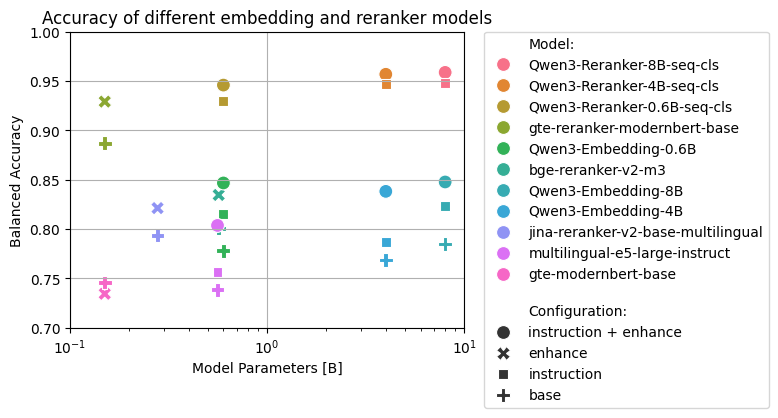

In [13]:

plt.figure(figsize=(8, 4))
scatter = sns.scatterplot(data=accurracy_compare_df, 
                          x="params", 
                          y="balanced_accuracy", 
                          hue='Model:', 
                          hue_order=[
                                "Qwen3-Reranker-8B-seq-cls",
                                "Qwen3-Reranker-4B-seq-cls",
                                "Qwen3-Reranker-0.6B-seq-cls",                               
                                "gte-reranker-modernbert-base",
                                "Qwen3-Embedding-0.6B",
                                "bge-reranker-v2-m3",
                                "Qwen3-Embedding-8B",
                                "Qwen3-Embedding-4B",
                                "jina-reranker-v2-base-multilingual",
                                "multilingual-e5-large-instruct",
                                "gte-modernbert-base",
                                ],
                          style='\nConfiguration:', 
                          style_order=["instruction + enhance", "enhance", "instruction", "base"],
                          s=100)
plt.ylim(0.70,1.0)
plt.xlim(0.1,10.0)
plt.grid()
plt.xlabel("Model Parameters [B]")
plt.ylabel("Balanced Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
plt.tight_layout()
if SAVE_FIGURES:
      plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, 'all_embeddings.png'))
      plt.draw()
else:
      plt.title('Accuracy of different embedding and reranker models')
plt.show()

In [14]:
accurracy_compare_df.sort_values("balanced_accuracy", ascending=False)

,\nConfiguration:,Model:,params,with_instrct,with_enhance,is_reranker,precision,recall,f1,specificity,balanced_accuracy
5,instruction + enhance,Qwen3-Reranker-8B-seq-cls,8.000,True,True,True,0.985052,0.988823,0.986934,0.928466,0.958645
13,instruction + enhance,Qwen3-Reranker-4B-seq-cls,4.000,True,True,True,0.985373,0.983028,0.984199,0.930439,0.956734
6,instruction,Qwen3-Reranker-8B-seq-cls,8.000,True,False,True,0.983213,0.975887,0.979537,0.920572,0.948230
14,instruction,Qwen3-Reranker-4B-seq-cls,4.000,True,False,True,0.983725,0.969575,0.976599,0.923532,0.946553
7,instruction + enhance,Qwen3-Reranker-0.6B-seq-cls,0.600,True,True,True,0.984852,0.962124,0.973355,0.929452,0.945788
8,instruction,Qwen3-Reranker-0.6B-seq-cls,0.600,True,False,True,0.982263,0.939874,0.960601,0.919092,0.929483
3,enhance,gte-reranker-modernbert-base,0.150,False,True,True,0.982149,0.939460,0.960330,0.918599,0.929029
4,base,gte-reranker-modernbert-base,0.150,False,False,True,0.979891,0.857291,0.914500,0.916132,0.886711
23,instruction + enhance,Qwen3-Embedding-8B,8.000,True,True,False,0.969060,0.820035,0.888341,0.875185,0.847610
15,instruction + enhance,Qwen3-Embedding-0.6B,0.600,True,True,False,0.968285,0.821484,0.888864,0.871732,0.846608


Precision: 0.99
Recall: 0.98
Specificity: 0.93
F1: 0.98
Balanced Accuracy: 0.96


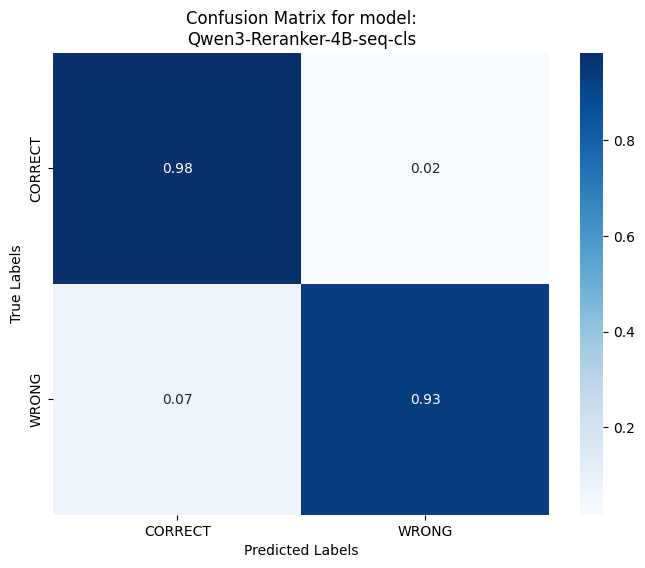

In [15]:
plot_df = merged_df.loc[(merged_df["embedding_model"].str.contains(BEST_MODEL)) *\
                         (merged_df["enhance"]==BEST_IS_ENHANCED) *\
                         (merged_df["reranker"]==BEST_IS_RERANKER) *\
                         (merged_df["instruction_applied"]==BEST_IS_INSTRUCTED) ]

precision, recall, f1, specificity, balanced_accuracy = calculate_metrics(plot_df)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1: {f1:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

# Get labels in the order for plotting the confusion matrix
true_labels = 1-plot_df['human_tag']
predicted_labels = 1-plot_df['a-vert_match']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels).astype(np.float64)
conf_matrix[0,:] /= conf_matrix.sum(axis=-1)[0]
conf_matrix[1,:] /= conf_matrix.sum(axis=-1)[1]
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='0.2f', cmap='Blues',
            xticklabels=['CORRECT', 'WRONG'],
            yticklabels=['CORRECT', 'WRONG'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
if SAVE_FIGURES:
    plt.draw()
    plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'confusion-matrix_{BEST_MODEL}.png'))
else:
    plt.title(f'Confusion Matrix for model:\n{BEST_MODEL}')
plt.show()


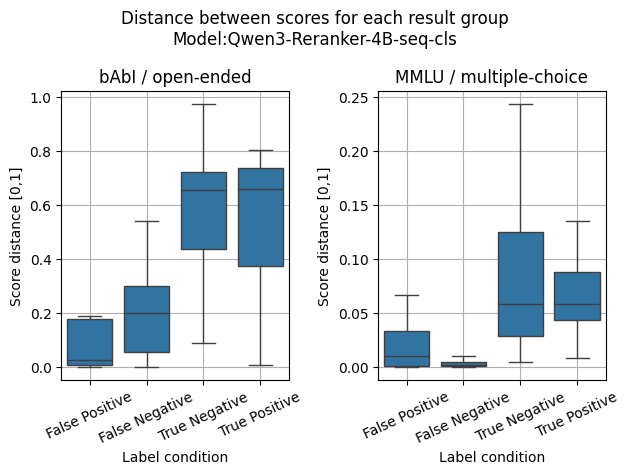

In [16]:

    
def get_group(row):
    _,row=row
    if row['human_tag'] and row['agree']:
        return "True Positive"
    if row['human_tag'] and not row['agree']:
        return "False Negative"
    if not row['human_tag'] and row['agree']:
        return "True Negative"
    if not row['human_tag'] and not row['agree']:
        return "False Positive"


plot_df = merged_df.loc[(merged_df["embedding_model"].str.contains(BEST_MODEL)) *\
                         (merged_df["enhance"]==BEST_IS_ENHANCED) *\
                         (merged_df["reranker"]==BEST_IS_RERANKER) *\
                         (merged_df["instruction_applied"]==BEST_IS_INSTRUCTED) ]

# plot_df = plot_df.loc[plot_df["task_type"]=="bAbI / open-ended"]



plot_df = plot_df.groupby(['agree', 'human_tag', "dataset_task", "task_type"]).agg(
        {
            'a-vert_correct_score' : 'mean',
            'a-vert_wrong_score' : 'mean',
        }
    ).reset_index()
plot_df['score_distance']=plot_df['a-vert_correct_score']-plot_df['a-vert_wrong_score']
plot_df['score_abs_distance']=np.abs(plot_df['score_distance'])
plot_df['group'] = [get_group(a) for a in plot_df.iterrows()]


if not SAVE_FIGURES:
    plt.figure()  
for i, data_part in enumerate(["bAbI / open-ended", "MMLU / multiple-choice"]):
    plot_df2 = plot_df.loc[(plot_df["task_type"]==data_part)]
    # plot_df.boxplot(by='group', column =['score_distance'])
    if SAVE_FIGURES:
        plt.figure()  
        ax=plt.gca()
    else:
        ax=plt.subplot(1,2,i+1)
    sns.boxplot(data=plot_df2, x="group", y="score_abs_distance", ax=ax, showfliers=False)

    plt.grid()
    plt.xlabel("Label condition")
    plt.ylabel("Score distance [0,1]")
    plt.xticks(rotation=25)

    if SAVE_FIGURES:
        plt.draw()
        plt.tight_layout()
        if 'mmlu' in data_part.lower():
            plot_name = 'mmlu_dist_targets'
        else:
            plot_name = 'babi_dist_targets'
        plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'{plot_name}.png'))
        plt.show()
    else:
        plt.title(data_part)


if not SAVE_FIGURES:
    plt.suptitle(f'Distance between scores for each result group\nModel:{BEST_MODEL}')
    plt.tight_layout()
    plt.show()



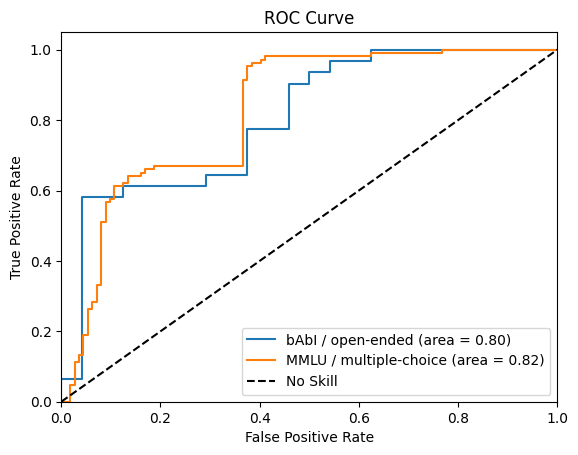

In [17]:
plt.figure()  
for data_part in ["bAbI / open-ended", "MMLU / multiple-choice"]:
    plot_df2 = plot_df.loc[(plot_df["task_type"]==data_part)]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(plot_df2['human_tag'], plot_df2['a-vert_correct_score']) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve

    plt.plot(fpr, tpr, label=f'{data_part} (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

if SAVE_FIGURES:
    plt.draw()
    plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'ROC_{BEST_MODEL}.png'))
else:
    plt.title(data_part)
    plt.title('ROC Curve')
    plt.legend()
plt.show()

# SemScore Analysis

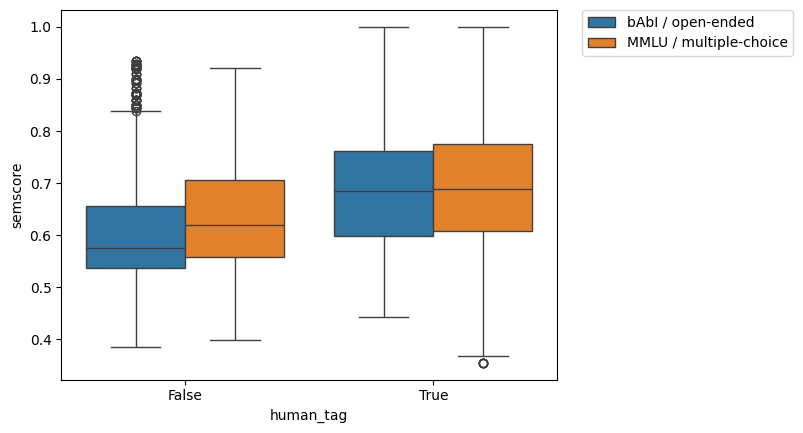

In [18]:
plt.figure()
# semscore_df = merged_df.loc[merged_df["embedding_model"].str.contains("Qwen3-Reranker-0.6B-seq-cls")] # This run calcualted semscore
semscore_df = merged_df.loc[(merged_df["semscore"] != 0)]
# semscore_df.boxplot(by='human_tag', column =['semscore'],)
# sns.violinplot(data=semscore_df, x="human_tag", y="semscore", hue="task_type")
sns.boxplot(data=semscore_df, x="human_tag", y="semscore", hue="task_type", legend=(not SAVE_FIGURES))


if SAVE_FIGURES:
    plt.draw()
    plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'semscore_boxplot.png'))
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [19]:
# Calculate optimal threshold
opt_val = 0
thrs_opt = 0
for thrs in np.linspace(0.01,0.99,100):
    predicted_semscore = semscore_df['semscore'] > thrs
    opt = balanced_accuracy_score(semscore_df['human_tag'], predicted_semscore)
    if opt_val < opt:
        opt_val = opt
        thrs_opt = thrs
print(f"Optimal Threshold: {thrs_opt}\nBalanced Accuracy: {opt_val}")

Optimal Threshold: 0.6138383838383838
Balanced Accuracy: 0.6275984384914002


In [20]:
thrs = thrs_opt
predicted_semscore = semscore_df['semscore'] > thrs

# Calculate precision and recall
precision = precision_score(semscore_df['human_tag'], predicted_semscore)
recall = recall_score(semscore_df['human_tag'], predicted_semscore)
f1 = f1_score(semscore_df['human_tag'], predicted_semscore)
specificity = recall_score(1-semscore_df['human_tag'], 1-predicted_semscore)
balanced_accuracy = balanced_accuracy_score(semscore_df['human_tag'], predicted_semscore)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1: {f1:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

Precision: 0.88
Recall: 0.72
Specificity: 0.53
F1: 0.79
Balanced Accuracy: 0.63


# Baselines Comparisons

In [21]:
merged_to_compare_df = merged_df.loc[(merged_df["embedding_model"].str.contains(BEST_MODEL)) *\
                         (merged_df["enhance"]==BEST_IS_ENHANCED) *\
                         (merged_df["reranker"]==BEST_IS_RERANKER) *\
                         (merged_df["instruction_applied"]==BEST_IS_INSTRUCTED) ]
grouped_to_compare_df = merged_to_compare_df.groupby(['language_model',	'dataset_task']).agg(
        {
            'human_tag' : "mean", 
            'a-vert_match': "mean",
            'agree': "mean"
        }
    ).reset_index().sort_values("agree")
grouped_to_compare_df.head()

,language_model,dataset_task,human_tag,a-vert_match,agree
4,Meta-Llama-3-3-70B-Instruct-AWQ-INT4,babi-task_05-three_argument_relations,0.880,0.780,0.780
191,gpt-oss-20b,babi-task_10-indefinite_knowledge,0.900,0.700,0.800
163,Qwen3-30B-A3B-GPTQ-Int4,mmlu_pro-category_engineering,0.400,0.550,0.850
198,gpt-oss-20b,babi-task_17-positional_reasoning,0.300,0.175,0.875
118,Qwen3-30B-A3B-GPTQ-Int4,mmlu_college_computer_science_chat_generative,0.825,0.950,0.875


### MMLU-Pro --- Completions + Logits

In [22]:
logits_rows = list()
for lm_dir in os.listdir(BASELINES_PATH):
    model_path = os.path.join(BASELINES_PATH, lm_dir)
    if not os.path.isdir(model_path):
        continue
    # The file should be here
    for results_file in os.listdir(os.path.join(BASELINES_PATH, lm_dir, "mmlu_pro_categories")):
        if "results_" not in results_file:
            continue
        # Read all lines
        with open(os.path.join(BASELINES_PATH, lm_dir, "mmlu_pro_categories", results_file), 'r') as f:
            obj = json.load(f)
            for key in obj["results"].keys():
                if "mmlu_pro-category-leaderboard" in key:
                    logits_rows.append([
                        lm_dir,
                        "mmlu_pro-category"+key.split("mmlu_pro-category-leaderboard")[-1],
                        obj["results"][key]["acc,none"]
                    ])

logits_df = pd.DataFrame(logits_rows, columns=["language_model", "dataset_task", "acc_score"])
merged_logits_df = pd.merge(logits_df, grouped_to_compare_df, on=['language_model', 'dataset_task'])

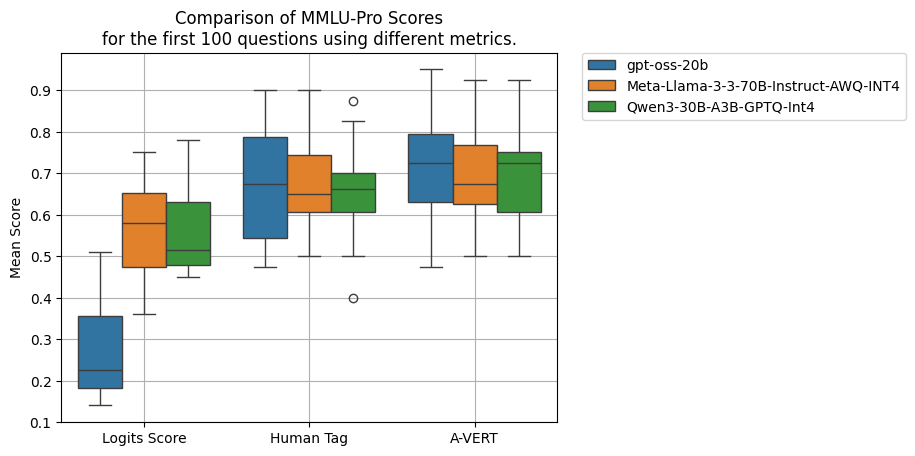

In [23]:
plt_df = deepcopy(merged_logits_df)
plt_df["Logits Score"] = plt_df["acc_score"]
plt_df["Human Tag"] = plt_df["human_tag"]
plt_df["A-VERT"] = plt_df["a-vert_match"]

df_melt = plt_df.melt(id_vars = 'language_model',
                  value_vars = ['Logits Score', 'Human Tag', 'A-VERT'],
                  var_name = 'columns')

sns.boxplot(data = df_melt,
                hue = 'language_model', # different colors for different 'cls'
                x = 'columns',
                y = 'value',
                order = ['Logits Score', 'Human Tag', 'A-VERT'],
                 legend=(not SAVE_FIGURES) )
plt.grid()

plt.xlabel("")
plt.ylabel("Mean Score")

if SAVE_FIGURES:
    plt.draw()
    plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'mmlu-pro_comparison.png'))
else:
    plt.title('Comparison of MMLU-Pro Scores\nfor the first 100 questions using different metrics.')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

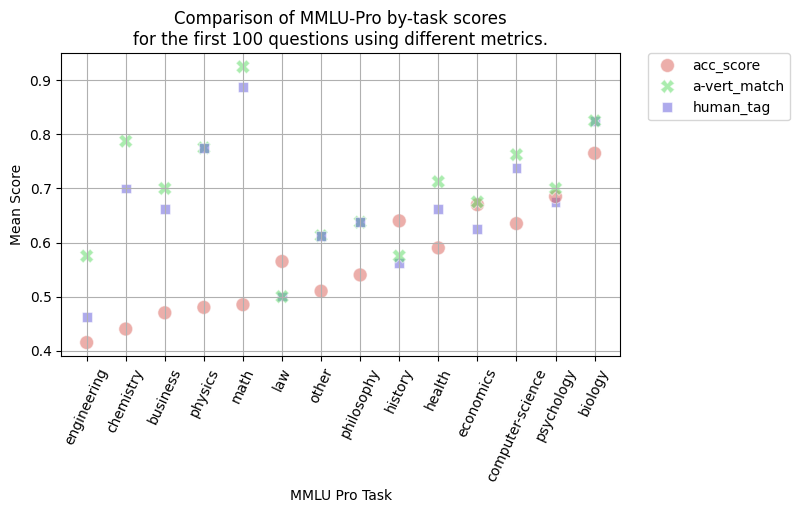

In [24]:
plot_df = merged_logits_df.loc[merged_logits_df["language_model"] != "gpt-oss-20b"]
# plot_df = merged_logits_df.loc[merged_logits_df["language_model"] == "Meta-Llama-3-3-70B-Instruct-AWQ-INT4"]
# plot_df = merged_logits_df.loc[merged_logits_df["language_model"] == "Qwen3-30B-A3B-GPTQ-Int4"]

plot_df = plot_df.melt(id_vars = ['dataset_task', "language_model"],
                  value_vars = ['acc_score', 'human_tag', 'a-vert_match'],
                  var_name = 'scorer')
plot_df = plot_df.groupby(["scorer", "dataset_task"]).agg({"value":"mean"}).reset_index()
plot_df = plot_df.sort_values("value",ascending=True)
plot_df["dataset_task"] = [a.split("mmlu_pro-category_")[-1] for a in plot_df["dataset_task"].values]
plot_df.head()

# plot_df["value"] += np.random.normal(0, 0.01, len(plot_df))

scatter = sns.scatterplot(data=plot_df, 
                          x="dataset_task",
                          y="value", 
                          hue='scorer', 
                          hue_order=['acc_score', 'a-vert_match', 'human_tag'], 
                          style='scorer', 
                          style_order=['acc_score', 'a-vert_match', 'human_tag'], 
                          s=100,
                          palette="hls", alpha=0.5,
                          legend=(not SAVE_FIGURES)
                          )
# pltylim(0.5,1.0)
plt.grid()
plt.xlabel("MMLU Pro Task")
plt.ylabel("Mean Score")
plt.xticks(rotation=65)
plt.tight_layout()

if SAVE_FIGURES:
    plt.draw()
    plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'mmlu-pro_comp_task.png'))
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Comparison of MMLU-Pro by-task scores\nfor the first 100 questions using different metrics.')

plt.show()

### bAbI --- Completions + Exact-Match

In [25]:
logits_rows = list()
for lm_dir in os.listdir(BASELINES_PATH):
    model_path = os.path.join(BASELINES_PATH, lm_dir)
    if not os.path.isdir(model_path):
        continue
    # The file should be here
    for results_file in os.listdir(os.path.join(BASELINES_PATH, lm_dir, "babi_tasks")):
        if "results_" not in results_file:
            continue
        # Read all lines
        with open(os.path.join(BASELINES_PATH, lm_dir, "babi_tasks", results_file), 'r') as f:
            obj = json.load(f)
            for key in obj["results"].keys():
                if "babi_tasks_completions" in key:
                    logits_rows.append([
                        lm_dir,
                        "babi-task_"+key.split("babi_tasks_completions-task_")[-1],
                        obj["results"][key]["exact_match,get_response"]
                    ])

babi_base_df = pd.DataFrame(logits_rows, columns=["language_model", "dataset_task", "exact_match"])

merged_babi_base_df = pd.merge(babi_base_df, grouped_to_compare_df, on=['language_model', 'dataset_task'])


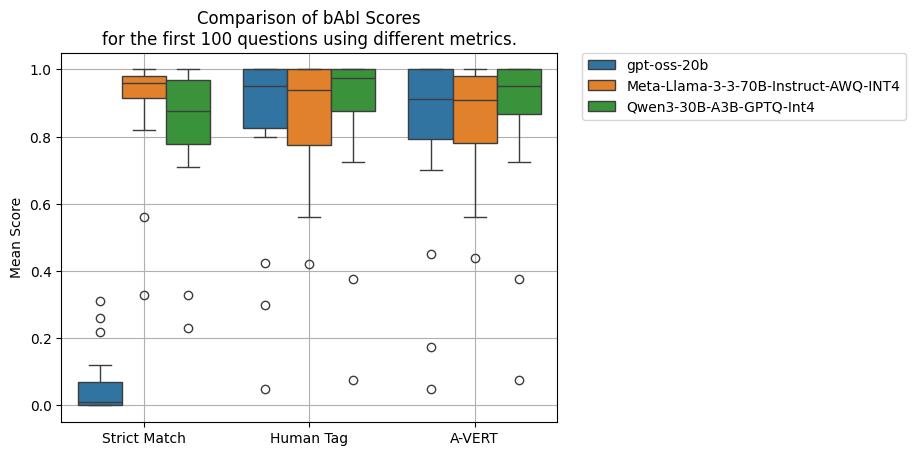

In [26]:
plt_df = deepcopy(merged_babi_base_df)
plt_df["Strict Match"] = plt_df["exact_match"]
plt_df["Human Tag"] = plt_df["human_tag"]
plt_df["A-VERT"] = plt_df["a-vert_match"]

df_melt = plt_df.melt(id_vars = 'language_model',
                  value_vars = ['Strict Match', 'Human Tag', 'A-VERT'],
                  var_name = 'columns')


sns.boxplot(data = df_melt,
                hue = 'language_model', # different colors for different 'cls'
                x = 'columns',
                y = 'value',
                order = ['Strict Match', 'Human Tag', 'A-VERT'],
                 legend=(not SAVE_FIGURES)
                   )
plt.grid()
plt.xlabel("")
plt.ylabel("Mean Score")

if SAVE_FIGURES:
  plt.draw()
  plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'babi_comparison.png'))
else:
  plt.title('Comparison of bAbI Scores\nfor the first 100 questions using different metrics.')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

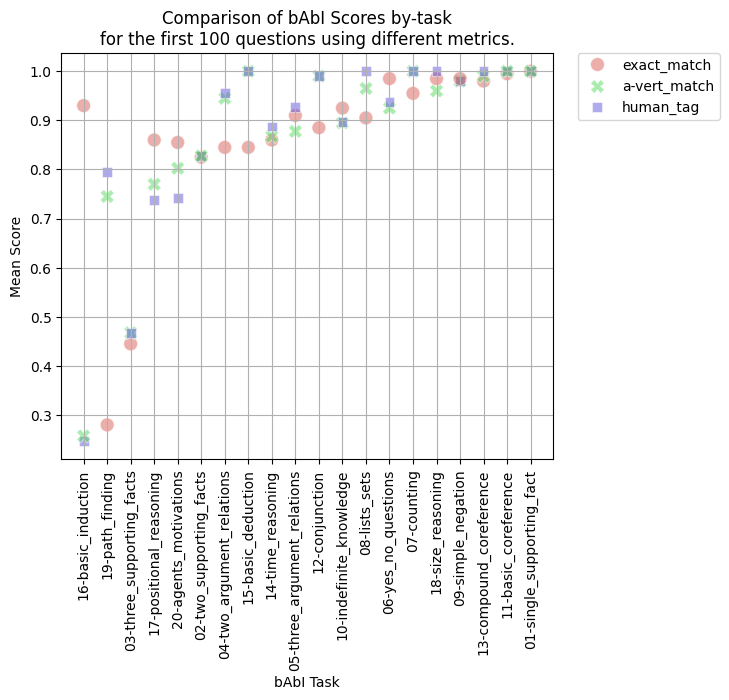

In [27]:
plot_df = merged_babi_base_df.loc[merged_babi_base_df["language_model"] != "gpt-oss-20b"]
# plot_df = merged_babi_base_df.loc[merged_babi_base_df["language_model"] == "Meta-Llama-3-3-70B-Instruct-AWQ-INT4"]
# plot_df = merged_babi_base_df.loc[merged_babi_base_df["language_model"] == "Qwen3-30B-A3B-GPTQ-Int4"]


plot_df = plot_df.melt(id_vars = ['dataset_task', "language_model"],
                  value_vars = ['exact_match', 'human_tag', 'a-vert_match'],
                  var_name = 'scorer')
plot_df = plot_df.groupby(["scorer", "dataset_task"]).agg({"value":"mean"}).reset_index()
plot_df = plot_df.sort_values("value",ascending=True)
if not SAVE_FIGURES:
  plot_df["dataset_task"] = [a.split("babi-task_")[-1] for a in plot_df["dataset_task"].values]
else:
  plot_df["dataset_task"] = [a.split("babi-task_")[-1].split("-")[0] for a in plot_df["dataset_task"].values]


scatter = sns.scatterplot(data=plot_df, 
                          x="dataset_task",
                          y="value", 
                          hue='scorer', 
                          hue_order=['exact_match', 'a-vert_match', 'human_tag'], 
                          style='scorer', 
                          style_order=['exact_match', 'a-vert_match', 'human_tag'], 
                          s=100,
                          palette="hls", alpha=0.5,
                          legend=(not SAVE_FIGURES)
                          )
# pltylim(0.5,1.0)
plt.grid()
plt.xlabel("bAbI Task")
plt.ylabel("Mean Score")
plt.tight_layout()

if SAVE_FIGURES:
  plt.draw()
  plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'babi_comp_task.png'))
else:
  plt.title('Comparison of bAbI Scores by-task\nfor the first 100 questions using different metrics.')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.xticks(rotation=90)
    
plt.show()

### MMLU --- Chat-Completions + Exact-Match

In [28]:
logits_rows = list()
for lm_dir in os.listdir(BASELINES_PATH):
    model_path = os.path.join(BASELINES_PATH, lm_dir)
    if not os.path.isdir(model_path):
        continue
    # The file should be here
    for results_file in os.listdir(os.path.join(BASELINES_PATH, lm_dir, "mmlu_generative")):
        if "results_" not in results_file:
            continue
        # Read all lines
        with open(os.path.join(BASELINES_PATH, lm_dir, "mmlu_generative", results_file), 'r') as f:
            obj = json.load(f)
            for key in obj["results"].keys():
                if "mmlu_" in key:
                    logits_rows.append([
                        lm_dir,
                        "mmlu_"+key.split("mmlu_")[-1].split("_generative")[0]+ "_chat_generative",
                        obj["results"][key]["exact_match,get_response"]
                    ])

mmlu_base_df = pd.DataFrame(logits_rows, columns=["language_model", "dataset_task", "exact_match"])

merged_mmlu_base_df = pd.merge(mmlu_base_df, grouped_to_compare_df, on=['language_model', 'dataset_task'])


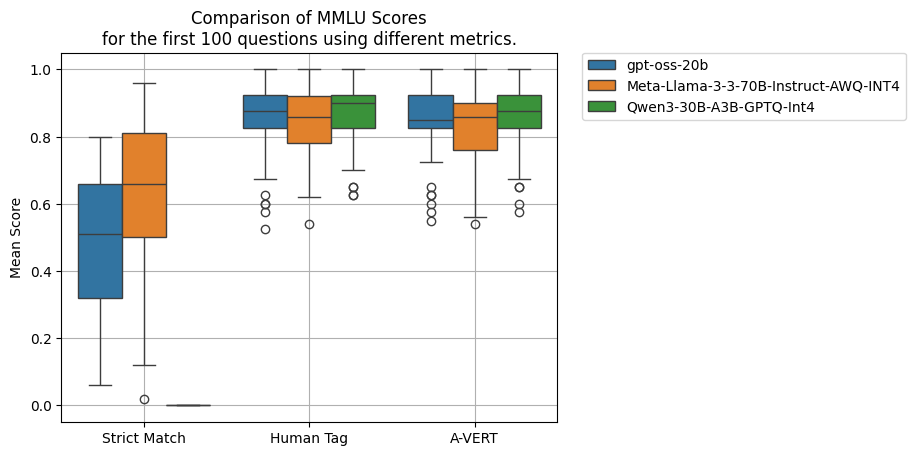

In [29]:
plt_df = deepcopy(merged_mmlu_base_df)
plt_df["Strict Match"] = plt_df["exact_match"]
plt_df["Human Tag"] = plt_df["human_tag"]
plt_df["A-VERT"] = plt_df["a-vert_match"]

df_melt = plt_df.melt(id_vars = 'language_model',
                  value_vars = ['Strict Match', 'Human Tag', 'A-VERT'],
                  var_name = 'columns')


sns.boxplot(data = df_melt,
                hue = 'language_model', # different colors for different 'cls'
                x = 'columns',
                y = 'value',
                order = ['Strict Match', 'Human Tag', 'A-VERT'],
                 legend=(not SAVE_FIGURES)
                   )
plt.grid()

plt.xlabel("")
plt.ylabel("Mean Score")

if SAVE_FIGURES:
  plt.draw()
  plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'mmlu_comparison.png'))
else:
  plt.title('Comparison of MMLU Scores\nfor the first 100 questions using different metrics.')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

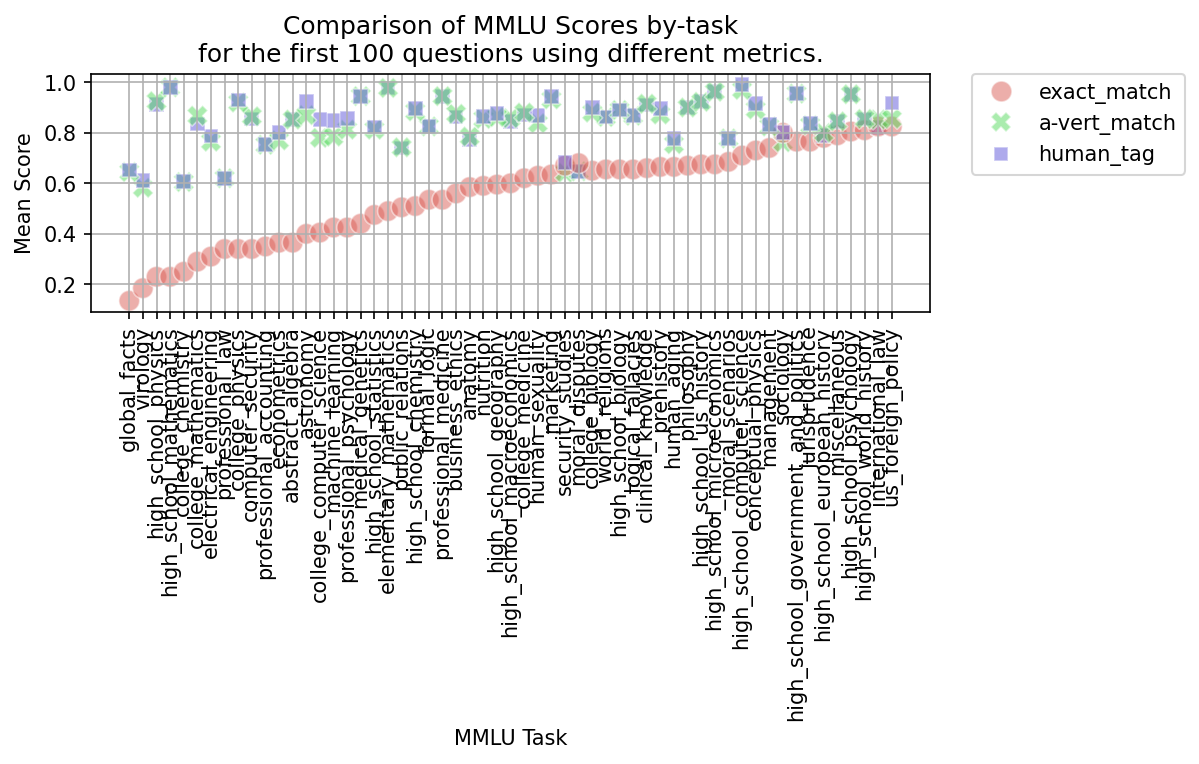

In [30]:
plot_df = merged_mmlu_base_df.loc[merged_mmlu_base_df["language_model"] != "Qwen3-30B-A3B-GPTQ-Int4"]
# plot_df = merged_babi_base_df.loc[merged_babi_base_df["language_model"] == "Meta-Llama-3-3-70B-Instruct-AWQ-INT4"]
# plot_df = merged_babi_base_df.loc[merged_babi_base_df["language_model"] == "gpt-oss-20b"]


plot_df = plot_df.melt(id_vars = ['dataset_task', "language_model"],
                  value_vars = ['exact_match', 'human_tag', 'a-vert_match'],
                  var_name = 'scorer')
plot_df = plot_df.groupby(["scorer", "dataset_task"]).agg({"value":"mean"}).reset_index()
plot_df = plot_df.sort_values("value",ascending=True)
plot_df["dataset_task"] = [a.split("mmlu_")[-1].split("_chat_generative")[0] for a in plot_df["dataset_task"].values]
plot_df.head()


plt.figure(dpi=150)
scatter = sns.scatterplot(data=plot_df, 
                          x="dataset_task",
                          y="value", 
                          hue='scorer', 
                          hue_order=['exact_match', 'a-vert_match', 'human_tag'], 
                          style='scorer', 
                          style_order=['exact_match', 'a-vert_match', 'human_tag'], 
                          s=100,
                          palette="hls", alpha=0.5,
                          legend=(not SAVE_FIGURES)
                          )
# pltylim(0.5,1.0)
plt.grid()
plt.xlabel("MMLU Task")
plt.ylabel("Mean Score")
plt.xticks(rotation=90)
plt.tight_layout()

if SAVE_FIGURES:
  plt.draw()
  plt.savefig(os.path.join(OUTPUT_PATH_FIGURES, f'mmlu_comp_task.png'))
else:
  plt.title('Comparison of MMLU Scores by-task\nfor the first 100 questions using different metrics.')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  
plt.show()